# Ford GoBike 
## by   : Said Fawzy Mohammed Huda

## Investigation Overview

> - In the following Slides we will go through data of GoBike System Data.
> - The Data includes information about individual rides made
in a bike-sharing system covering the greater San Francisco
Bay area.
> - We will try to explore what affects the Number of rides :


## What we will try to explore ?
> In this presentatin we will try to find what affect the Number of rides as :
>- Dose the time of ride affect number of rides ? (specific day of the week , specific month of the year)
>- What is the average rate of the trips ?
>- Does the Number of trips depends on the type of the user (customer or subscriber).
>- Dose the gender affect( Male or Female)
> - Dose the compination of Gender and age affect the duration ?
> - Dose the compnation of type of user and age affect the duration ?

## Dataset Overview

>- We have a data set of 16 fields of features that records rides.
>- We have 183,412 records
>- After data wrangeling we have new dataset of **19** fields and **174,952** records



##  the main features of interest in the dataset :
> We will be interested in :
>- The Number of rides ,and if the time or type of user affect
>- The duration of ride and if it is affected by user type or gender 

###  Features in the dataset that will help in investigation 

> Those features will help us investigate :
>- The week day of the ride
>- Month of the ride
>- Ride Duration
>- The Age of the member
>- The Gender of the member
>- The user type (customer of subscriber).

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
#importing data
bike_orig=pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
# Removing Null records and save into new data frame BIKE
bike=bike_orig.dropna(axis=0)


In [4]:
#Converting start_time into datetime type
bike['start_time']= pd.to_datetime(bike['start_time'])
#Add new field week_day
bike['week_day'] =bike['start_time'].dt.weekday
#let us convert the week day to names
day_lock ={0: 'sunday',1:'monday',2:'tuseday',3: 'wednesday', 4:'thursday', 5:'friday',6: 'saturday' }
#Let us add month column 
bike['month']=bike['start_time'].dt.month
#let us convert the month name
look_up = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May',
            6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

bike['month'] = bike['month'].apply(lambda x: look_up[x])


In [5]:
#Let us add the age column
bike['age']=2021- bike['member_birth_year']


In [6]:
#our data is collected in one month Feb ..so we can not see the affect of month
bike.month.value_counts()

Feb    174952
Name: month, dtype: int64

##  The Day of the Week 

> **Dose The day of the Week  affects No. of rides?**

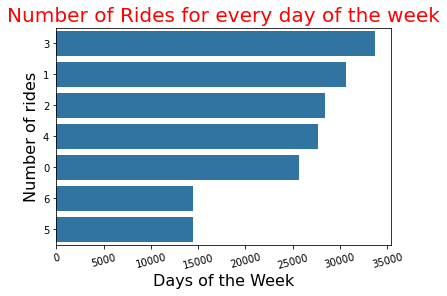

In [7]:
#Let us have the diagram orderd 
base_color = sb.color_palette()[0]
day_order = bike['week_day'].value_counts().index
sb.countplot(data=bike,y='week_day',color=base_color,
            order =day_order )
plt.xlabel('Days of the Week' ,size=16)
plt.ylabel('Number of rides',size=16)
plt.xticks(rotation=15);
plt.title('Number of Rides for every day of the week',size=20 ,color='red');

>For **Day of The Week** Variable :
> - we found that the day with high rides was Wednesday and then come after Monday and Tuesday. 
> - While Friday and Saturday were the less days which were expected.

# The Member Gender
> Does the gender of the member affect the No. of rides ?

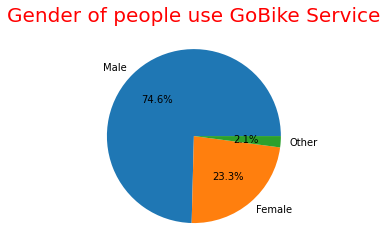

In [8]:
gender_counts = bike.member_gender.value_counts()
plt.pie(gender_counts , labels = gender_counts.index,autopct='%1.1f%%' );
plt.title('Gender of people use GoBike Service',fontsize=20,color='red');
plt.show();

> For The **Gender** Variable:
> - We found that most people use the service were male.

# The User Type

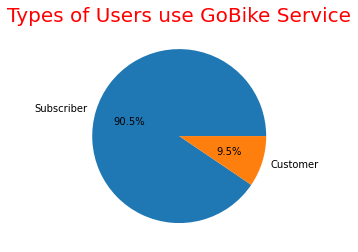

In [9]:
user_counts = bike.user_type.value_counts()
plt.pie(user_counts , labels = user_counts.index,autopct='%1.1f%%' );
plt.title('Types of Users use GoBike Service',fontsize=20 ,color='red');
plt.show();

> For the **Type of user** variable:
> - We found that most people use the service are **Subscribers**

# The Age
> Does the age of the user affect the Number of rides ?

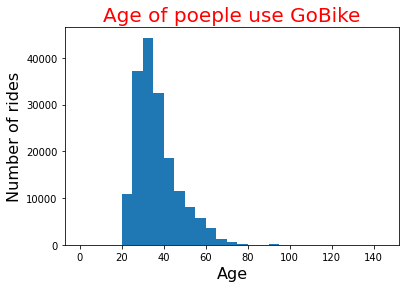

In [10]:
bins = np.arange(0,bike['age'].max()+5,5)
plt.hist(data=bike, x= 'age',bins=bins);
plt.xlabel('Age' ,size=16)
plt.ylabel('Number of rides',size=16)
plt.title('Age of poeple use GoBike',size=20,color='red');

> For **Age** Variable:
> - We found that most people use the services were in age between **25 Abd 40** , which was expected

# The Ride Duration
> Dose the ride duration affect the Number of rides?

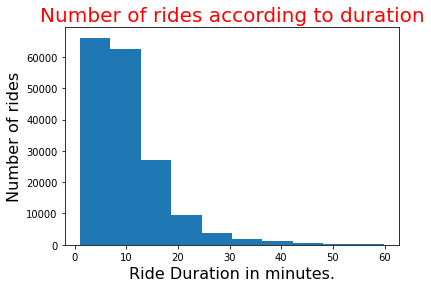

In [11]:
bike['dur_in_min'] =bike['duration_sec'] / 60
bike_mod= bike.query("dur_in_min < 60")
plt.hist(data=bike_mod,x='dur_in_min');
plt.xlabel('Ride Duration in minutes.' ,size=16)
plt.ylabel('Number of rides',size=16)
plt.title('Number of rides according to duration' , size=20, color='red');

> For **duration** Variable: 
> - We found that most ride durations were less than 10 min , which is expected for a bike ride

# ٌRelationship between Age and Ride Duration

> Is there a relation between the duration of the ride , and the age of the member.

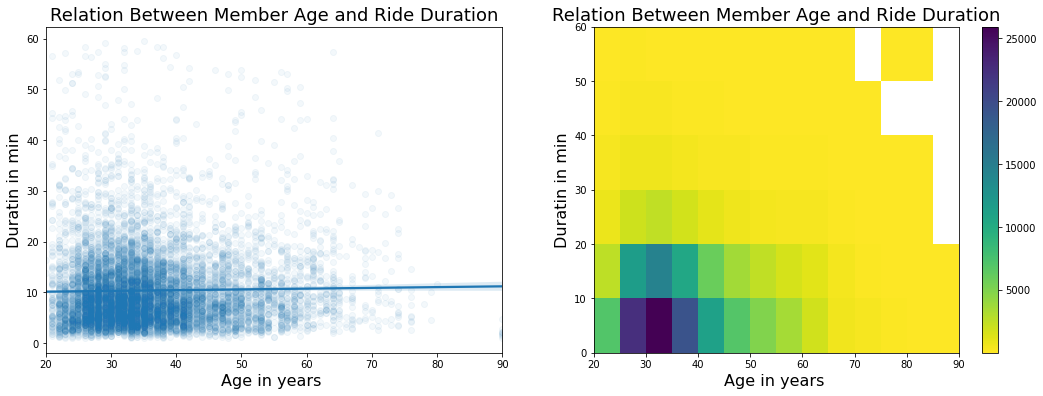

In [12]:
bike_mod2 = bike_mod.query('age < 100')
sample = bike_mod2.sample(10000)
#let us have the two plots in one figur
plt.figure(figsize = [18, 6])

# PLOT ON LEFT
plt.subplot(1, 2, 1)
sb.regplot(data=sample , x= 'age',y='dur_in_min', scatter_kws={'alpha':1/20});
plt.xlabel('Age in years ',fontsize=16)
plt.ylabel('Duratin in min',fontsize=16)
plt.title('Relation Between Member Age and Ride Duration',fontsize=18);

# PLOT ON RIGHT

plt.subplot(1, 2, 2)

# Specify bin edges 
bins_x = np.arange(20, 90+5, 5)
bins_y = np.arange(0, 60+10, 10)

plt.hist2d(data = bike_mod2, x = 'age', y = 'dur_in_min', cmin=0.5, cmap='viridis_r', bins = [bins_x, bins_y])
plt.colorbar()
plt.xlabel('Age in years ',fontsize=16)
plt.ylabel('Duratin in min',fontsize=16)
plt.title('Relation Between Member Age and Ride Duration',fontsize=18);

> - Most people use the service are young (less than 40 year old),mostly between 25-40 year old
> - Most rides are less than 10 minutes.
> - There is no clear indication that there is a  relation between member age and the duration of his/ride

# Relation Between Gender and Ride Duration
> Is there relation between the distribution of ride duration and the gender of the member ? 

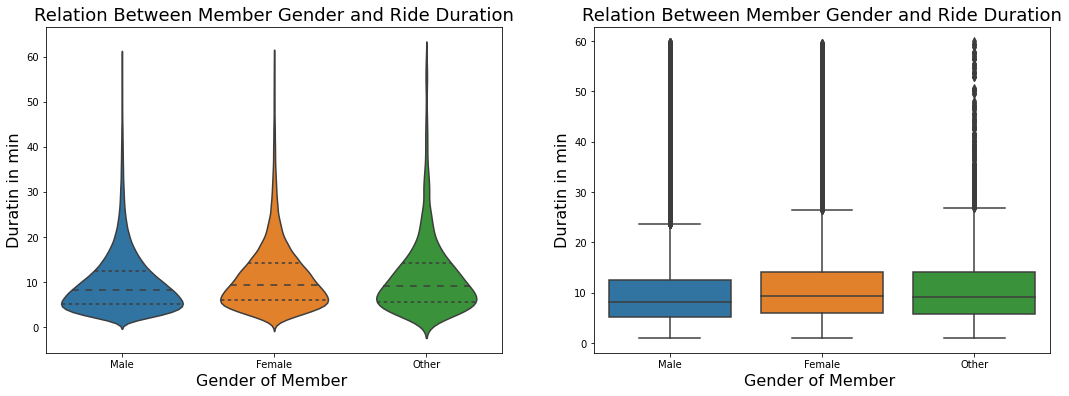

In [13]:
#It is better to have them side by side in one figur
plt.figure(figsize = [18, 6])

# PLOT ON LEFT
plt.subplot(1, 2, 1)

sb.violinplot(data=bike_mod2, x='member_gender', y='dur_in_min',inner='quartile');
plt.xlabel('Gender of Member ',fontsize=16)
plt.ylabel('Duratin in min',fontsize=16)
plt.title('Relation Between Member Gender and Ride Duration',fontsize=18);

# PLOT ON RIGHT
plt.subplot(1, 2, 2)

sb.boxplot(data=bike_mod2, x='member_gender', y='dur_in_min');
plt.xlabel('Gender of Member ',fontsize=16)
plt.ylabel('Duratin in min',fontsize=16)
plt.title('Relation Between Member Gender and Ride Duration',fontsize=18);

> - There is no effect of gender in the distribution of the ride duration
> - The three gender types have nearly the same distribution.
> - Male may have more slightly less median and disruption of the other two types
> - That mean that male duration has slightly less in average of the other two types

# Relationship Between Type of users and durations
> Let us see if there is relation between the type of users and the duration

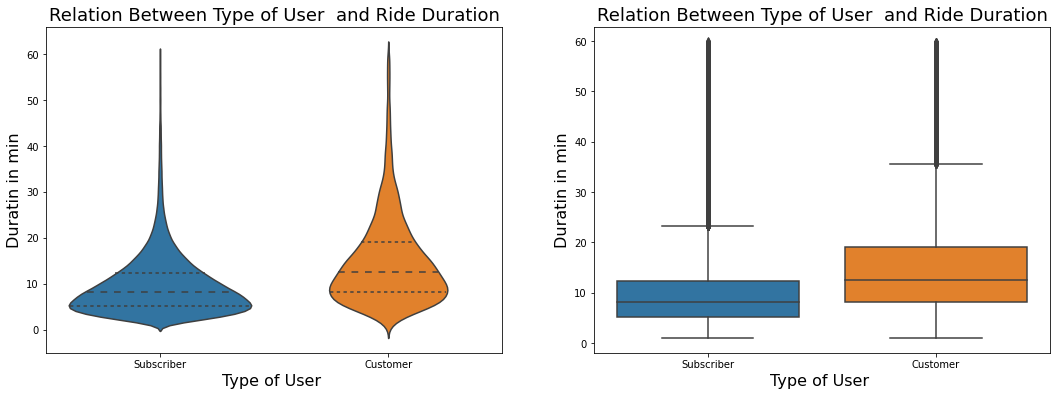

In [14]:
plt.figure(figsize = [18, 6])

# PLOT ON LEFT
plt.subplot(1, 2, 1)

sb.violinplot(data=bike_mod2, x='user_type', y='dur_in_min',inner='quartile');
plt.xlabel('Type of User ',fontsize=16)
plt.ylabel('Duratin in min',fontsize=16)
plt.title('Relation Between Type of User  and Ride Duration',fontsize=18);

# PLOT ON RIGHT
plt.subplot(1, 2, 2)

sb.boxplot(data=bike_mod2, x='user_type', y='dur_in_min');
plt.xlabel('Type of User ',fontsize=16)
plt.ylabel('Duratin in min',fontsize=16)
plt.title('Relation Between Type of User  and Ride Duration',fontsize=18);

> Although as we saw before that number of customer is only 9.5 % of all users , they are more distributed and have more average duration than the Subscribers that represents 90.5 %.

# Realationship between Type of User and the User Gender
> Let us see how is the distripution of user type according to gender

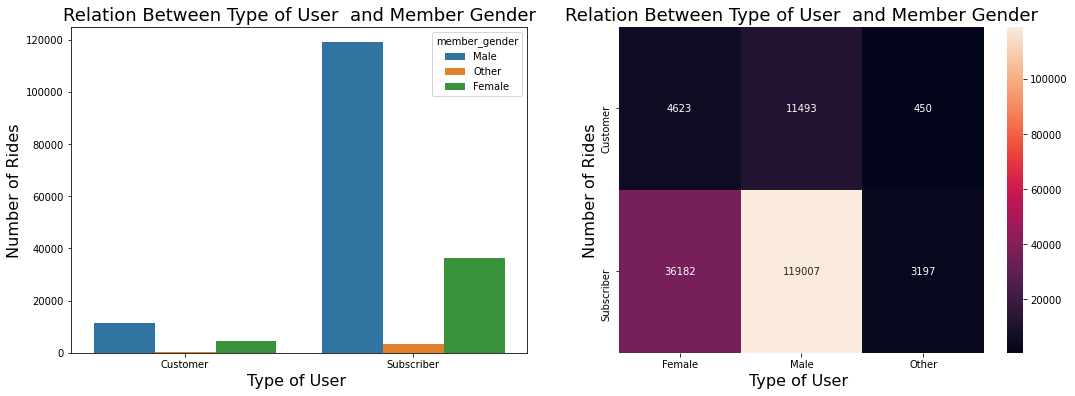

In [15]:
# Number of rides in each combination
user_counts = bike.groupby(['user_type', 'member_gender']).size()
#  convert  into a dataframe object
user_counts = user_counts.reset_index(name='count')
#  rearrange the data on rows
user_counts = user_counts.pivot(index = 'user_type', columns = 'member_gender', values = 'count')




plt.figure(figsize = [18, 6])

# PLOT ON LEFT
plt.subplot(1, 2, 1)

sb.countplot(data=bike,x='user_type', hue='member_gender')
plt.xlabel('Type of User ',fontsize=16)
plt.ylabel('Number of Rides',fontsize=16)
plt.title('Relation Between Type of User  and Member Gender',fontsize=18);

# PLOT ON RIGHT
plt.subplot(1, 2, 2)

sb.heatmap(user_counts , annot=True , fmt='d');
plt.xlabel('Type of User ',fontsize=16)
plt.ylabel('Number of Rides',fontsize=16)
plt.title('Relation Between Type of User  and Member Gender',fontsize=18);

> - **Male** are most people in  Subscriber and Customer Users.
> - Male Subscribers are 119K compared to only 11K for Male Customers.
> - Female Subscribers are 36K compared to only 4k for female customers.
> - Other gender Subscribers are 3K compared to only 450 of other customers

#  Relationship Between Age , Duration and Gender



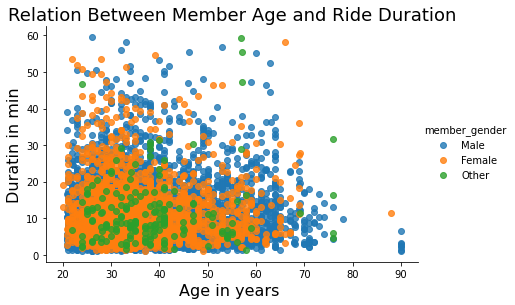

In [16]:
sample = bike_mod2.sample(10000)
g= sb.FacetGrid(data=sample, hue = 'member_gender',size = 4 ,aspect =1.5)
g.map(sb.regplot,'age','dur_in_min',x_jitter=0.04,fit_reg=False);
plt.xlabel('Age in years ',fontsize=16)
g.add_legend()
plt.ylabel('Duratin in min',fontsize=16)
plt.title('Relation Between Member Age and Ride Duration',fontsize=18);


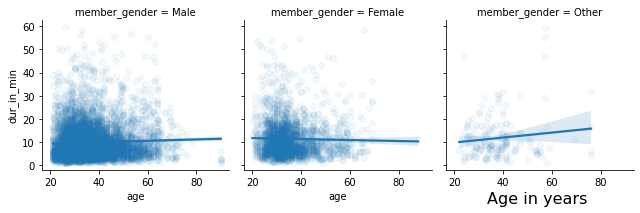

In [17]:
g = sb.FacetGrid(data = sample, col = 'member_gender')
g.map(sb.regplot,'age','dur_in_min',x_jitter=0.04,fit_reg=True, scatter_kws={'alpha':1/20});
plt.xlabel('Age in years ',fontsize=16);

> - Male users have more rides , and more ride duration with density of users between 20 and 60
> - Female users  have less rides , and less ride duration with density of users between 20 and 40
> - Other users have less rides but more ride duration average and more spread in distribution for age

# Relationship Between Age , Duration and User Type

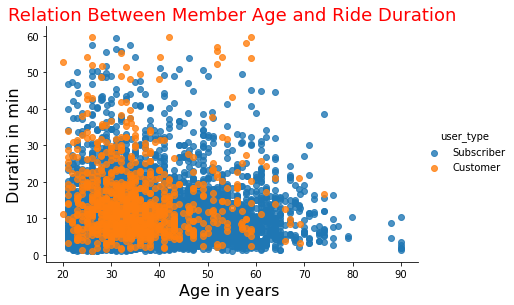

In [18]:
sample = bike_mod2.sample(10000)
g= sb.FacetGrid(data=sample, hue = 'user_type',size = 4 ,aspect =1.5)
g.map(sb.regplot,'age','dur_in_min',x_jitter=0.04,fit_reg=False);
plt.xlabel('Age in years ',fontsize=16)
g.add_legend()
plt.ylabel('Duratin in min',fontsize=16)
plt.title('Relation Between Member Age and Ride Duration',fontsize=18 ,color='red');

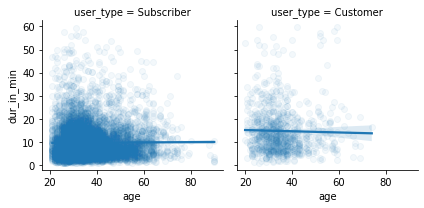

In [19]:
g = sb.FacetGrid(data = sample, col = 'user_type')
g.map(sb.regplot,'age','dur_in_min',x_jitter=0.04,fit_reg=True, scatter_kws={'alpha':1/20});

> - Male users have more rides , and more ride duration with denesity of users between 20 and 60
> - Femal users  have less rides , and less ride duratin with denesity of users between 20 and 40
> - Other users have less rides but more ride duration avarage and more spread in distripution for age.
> - Subscribers have more spread age distripution and avarage of ride duration of  about 10 min
> - Subscribers have denisty in age between 20 and 60
> - Customrs have less density with avarage of ride duration about 15 min and decrease with age growing
> - Customer have denisty of age between 20 and 40 

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!

In [21]:
!jupyter nbconvert slide_deck_template.ipynb --to slides --no-input

[NbConvertApp] Converting notebook slide_deck_template.ipynb to slides
[NbConvertApp] Writing 1225112 bytes to slide_deck_template.slides.html
